In [1]:
import math
from PIL import Image

import pandas as pd
import pickle
from pydantic import BaseModel
from typing import Any
import warnings
warnings.filterwarnings("ignore")

In [2]:
class Element(BaseModel):
    type: str
    text: Any
    page_number: int
    table_as_html: Any
    image_path: str
    coordinate : Any

In [104]:
book_image_caption = './lea_storage/data_book-text-book_fig_caption.pkl'
paper_image_caption = './lea_storage/data_paper-text-paper_figure_caption.pkl'

In [105]:
book_table_caption = './lea_storage/data_book-text-book_table_caption.pkl'
paper_table_caption = './lea_storage/data_paper-text-paper_table_captions.pkl'

In [106]:
with open(book_image_caption, 'rb') as file:
    book_image_caption = pickle.load(file)

In [107]:
with open(paper_image_caption, 'rb') as file:
    paper_image_caption = pickle.load(file)

In [108]:
with open(book_table_caption, 'rb') as file:
    book_table_caption = pickle.load(file)

In [109]:
with open(paper_table_caption, 'rb') as file:
    paper_table_caption = pickle.load(file)

### Align book title

In [110]:
for caption in book_image_caption:
    if caption['book_title']=='CT_and_MRI_of_the_Whole_Body':
        caption['book_title'] = 'CT and MRI of the Whole Body, 2-Volume Set, 6e, Volume I_mainpages'
    elif caption['book_title']=='Liver_imaging_MRI_with_CT_correlation':
        caption['book_title'] = 'Liver imaging _ MRI with CT correlation_mainpages'
    elif caption['book_title']=='Radiology_Illustrated_Hepatobiliary_and_Pancreatic_Radiology':
        caption['book_title'] = 'Radiology Illustrated_ Hepatobiliary and Pancreatic Radiology_mainpages'

# books

In [111]:
# text_position_path = "./lea_storage/figure_title.pkl"  #change with directory for figure title for books

In [112]:
import pickle
pickle_file_path = "./VP_storage/output_books_all.pkl"
with open(pickle_file_path, 'rb') as file:
    image_elements, captions, raw_elements, df_flattened, clean_df = pickle.load(file)

In [113]:
clean_df['Title'] = clean_df['Image_Path'].str.extract(r'([^/]+)/[^/]+\.jpg$')[0] + '_mainpages'

#### Step1: Align page numbers & coordinates

In [114]:
for title in book_image_caption:
    title['page_num'] += 1
    title['position'] = tuple(x * 200 /72 for x in title['position'])

In [115]:
for title in book_image_caption:
    df = clean_df[(clean_df['Page_Number']==title['page_num'])&(clean_df['Title']==title['book_title'])]
    df['distance'] = df['coordinate_bottom_left'].apply(lambda x: math.dist(x, title['position'][0:2]))
    try:
        title['image_path'] = df.loc[df['distance'].idxmin()]['Image_Path']
    except:
        pass

In [116]:
book_image_caption[10]

{'book_title': 'gastrointestinal-imaging-the-requisites-fourth-edition_mainpages',
 'page_num': 6,
 'position': (231.76583184136285,
  1663.2139417860244,
  1418.2422214084202,
  1693.2139078776042),
 'text': 'Figure 1-11.\u2002 Axial (A) and coronal (B) CT in a 77-year-old man with a large, wide-mouthed (arrow) epiphrenic diverticulum.\n',
 'image_path': './gastrointestinal-imaging-the-requisites-fourth-edition/figure-6-14.jpg'}

In [117]:
def demo(idx):
    print(book_image_caption[idx]['text'].replace('\n', ''))
    image = Image.open("./VP_storage/output_books/" + book_image_caption[idx]['image_path'][1:])
    display(image)

Figure 2-14.  Axial (A) and coronal (B) contrast-enhanced CT in a 56-year-old woman with diffuse gastric mucosal thickening (arrows) caused by antral gastritis. The fundus is relatively normal.


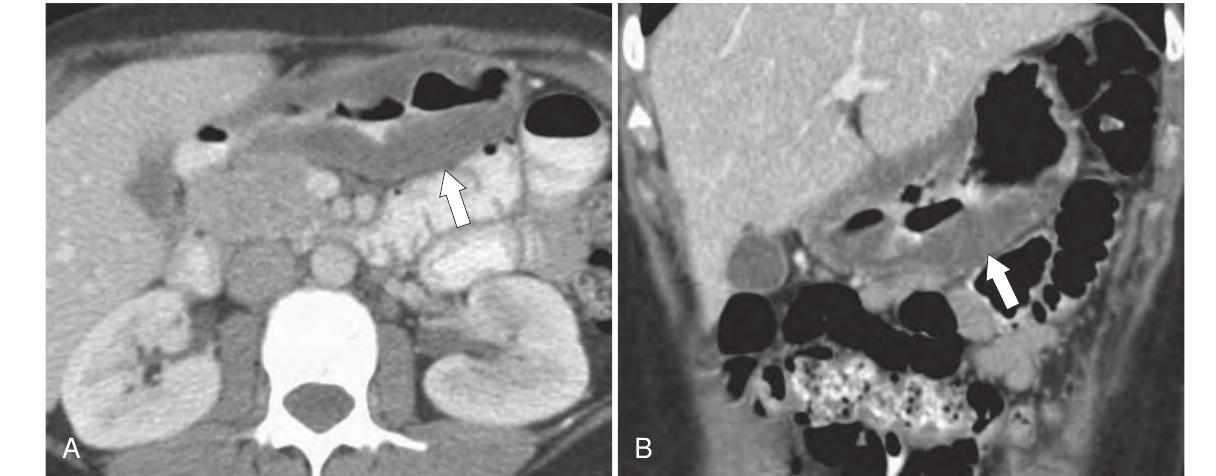

In [118]:
demo(100)

In [119]:
with open('./lea_storage/book_image_caption_coordinated.pkl', 'wb') as file:
    pickle.dump(book_image_caption, file)

# papers

### Align title name

In [120]:
uni_title = []
for paper in paper_image_caption:
    if paper['book_title']=='Imaging evaluation of the liver in oncology patients':
        paper['book_title'] = 'WJH-13-1936_mainpages'
    elif paper['book_title']=='Hyperintense Liver Masses at Hepatobiliary Phase Gadoxetic Acidenhanced MRI':
        paper['book_title'] = 'fujita-et-al-2019-hyperintense-liver-masses-at-hepatobiliary-phase-gadoxetic-acid-enhanced-mri-imaging-appearances-and_mainpages'
    elif paper['book_title']=='How to Use LI-RADS to Report Liver CT and MRI Observations':
        paper['book_title'] = 'm-cunha-et-al-2021-how-to-use-li-rads-to-report-liver-ct-and-mri-observations_mainpages'
    elif paper['book_title']=='Abbreviated MRI for Hepatocellular Carcinoma Screening and Surveillance':
        paper['book_title'] = 'an-et-al-2020-abbreviated-mri-for-hepatocellular-carcinoma-screening-and-surveillance_mainpages'
    elif paper['book_title']=='Role of MRI in Evaluation of Spectrum of Liver Lesions in Cirrhotic Patients':
        paper['book_title'] = 'RoleofMRIinEvaluationofSpectrumofLiverLesionsinCirrhoticPatients-JAPI_mainpages'


### Fix typo

In [121]:
for paper in paper_image_caption:
    if 'positioin' in paper.keys():
        paper['position'] = paper['positioin']

In [122]:
pickle_file_path = "./VP_storage/output_papers_all.pkl"
with open(pickle_file_path, 'rb') as file:
    image_elements, captions, raw_elements, df_flattened, clean_df = pickle.load(file)

In [123]:
clean_df['Title'] = clean_df['Image_Path'].str.extract(r'([^/]+)/[^/]+\.jpg$')[0] + '_mainpages'

#### Step1: Align page numbers & coordinates

In [124]:
for title in paper_image_caption:
    title['page_num'] += 1
    title['position'] = tuple(x * 200 /72 for x in title['position'])

#### Step2: Match

In [125]:
for title in paper_image_caption:
    df = clean_df[(clean_df['Page_Number']==title['page_num'])&(clean_df['Title']==title['book_title'])]
    df['distance'] = df['coordinate_bottom_left'].apply(lambda x: math.dist(x, title['position'][0:2]))
    title['image_path'] = df.loc[df['distance'].idxmin()]['Image_Path']

In [126]:
def demo(idx):
    print(paper_image_caption[idx]['text'].replace('\n', ''))
    image = Image.open("./VP_storage/output_papers/" + paper_image_caption[idx]['image_path'][1:])
    display(image)

Figure 5 Right lobe liver metastasis from breast cancer. A: Axial T2-weighted imaging (WI) of the metastatic lesion shows a target sign characterized as a hyperintense center (arrow) - necrosis - marginated by a lesser intense rim of viable tumor; B: Diffusion WI shows viable tumor characterized by an increased signal; C: Axial fat sat (FS) contrast-enhanced magnetic resonance imaging (CE-MRI) T1-WI in the arterial phase shows a characteristic doughnut sign; D: Axial FS CE-MRI T1-WI in the interstitial phase reveals a mild progressive enhancement of the peripheral tumor (arrow).


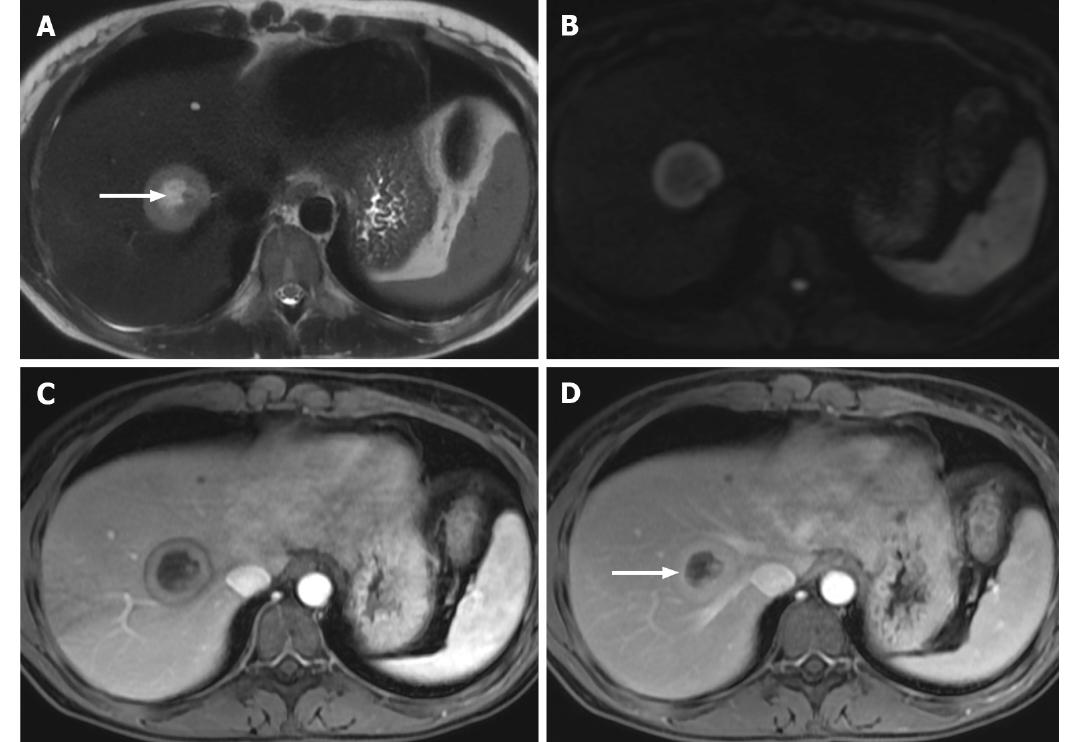

In [127]:
demo(4)

In [128]:
with open('./lea_storage/paper_image_caption_coordinated.pkl', 'wb') as file:
    pickle.dump(paper_image_caption, file)

# System Guides

In [129]:
text_position_path = "./lea_storage/data_system_guide-text-system_guide_text.pkl"

In [130]:
import pickle
pickle_file_path = "./VP_storage/output_system_guides_all.pkl"
with open(pickle_file_path, 'rb') as file:
    image_elements, captions, raw_elements, df_flattened, clean_df = pickle.load(file)

In [131]:
clean_df['Title'] = clean_df['Image_Path'].str.extract(r'([^/]+)/[^/]+\.jpg$')[0] + '_mainpages'

In [132]:
with open(text_position_path, 'rb') as file:
    text_pos = pickle.load(file)

In [133]:
for text in text_pos:
    if text['book_title']=='Reporting-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Reporting _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='Getting_Started-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Getting Started _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='Imaging_Features-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Imaging Features _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='Management-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Management _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='Treatment_Response-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Treatment Response _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='Diagnostic_Categories-Reporting_and_Data_Systems_Support':
        text['book_title'] = 'Diagnostic Categories _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=="What's_new_in_v2018-Reporting_and_Data_Systems_Support":
        text['book_title'] = "What's New in v2018 _ RADS - Reporting and Data Systems Support_mainpages"
    elif text['book_title']=='Technique-Reporting_and_Data_Systems_Support':
        text['book_title'] = "Technique _ RADS - Reporting and Data Systems Support_mainpages"
    elif text['book_title']=='Diagnosis-Reporting_and_Data_Systems_Support':
        #text['book_title'] = 'Diagnostic Categories _ RADS - Reporting and Data Systems Support_mainpages'
        text['book_title'] = 'Diagnosis _ RADS - Reporting and Data Systems Support_mainpages'
    elif text['book_title']=='LI-RADS_US_Surveillance_v2024_Core':
        text['book_title'] = 'LI-RADS US Surveillance v2024 Core_mainpages'
    elif text['book_title']=='LI-RADS_CTMR_Radiation_TRA_v2024_Core':
        text['book_title'] = 'LI-RADS CTMR Radiation TRA v2024 Core_mainpages'
    elif text['book_title']=='LI-RADS_CTMR_Nonradiation_TRA_v2024_Core':
        text['book_title'] = 'LI-RADS CTMR Nonradiation TRA v2024 Core_mainpages'
    elif text['book_title']=='LI-RADS_2018_Core':
        text['book_title'] = 'LI-RADS 2018 Core_mainpages'

#### Step1: Align page numbers & coordinates

In [137]:
for title in text_pos:
    title['page_num'] += 1

In [138]:
text_pos[0]

{'book_title': 'Reporting _ RADS - Reporting and Data Systems Support_mainpages',
 'page_num': 1,
 'text': 'FAQ-130: A patient presenting for US HCC screening/surveillance has a complex cyst. How should I report this finding? The US LI-RADS report should have a field for other important findings. For example, a complex cyst could be reported as: i. US-1, Negative -- No US evidence of HCC ii. Other: xx-cm complex cyst in [right, left] lobe. Recommend [provide recommendation based on your assessment]',
 'figure_path': ''}

In [139]:
text_pos[10]

{'book_title': 'Getting Started _ RADS - Reporting and Data Systems Support_mainpages',
 'page_num': 6,
 'text': 'FAQ-123: Can US LI-RADS be used for patients who have had HCC treatment (ablation, embolization, partial hepatectomy)? The US screening and surveillance population for HCC is, by definition, for those who have no current or prior HCC. Therefore, patients with current, prior or treated HCC should not be screened with US (unless transplanted). Without the benefit of intravenous contrast, differentiating nonviable from viable tumor is not possible. Therefore, patients who have undergone HCC treatment are preferentially screened with multiphase contrast-enhanced CT/MRI or CEUS. Thus, we do not advocate applying US LI-RADS to this patient population.',
 'figure_path': ''}

#### Step2: Match

In [140]:
for title in text_pos:
    df = clean_df[(clean_df['Page_Number']==title['page_num'])&(clean_df['Title']==title['book_title'])]
    # df['distance'] = df['coordinate_bottom_left'].apply(lambda x: math.dist(x, title['position'][0:2]))
    title['image_path'] = df['Image_Path'].to_list()

In [152]:
text_pos = [entry for entry in text_pos if entry['image_path']]

In [153]:
with open('./lea_storage/system_guide_image_caption_coordinated.pkl', 'wb') as file:
    pickle.dump(text_pos, file)

In [155]:
text_pos

[{'book_title': 'Reporting _ RADS - Reporting and Data Systems Support_mainpages',
  'page_num': 5,
  'text': 'FAQ-133: Is there a standardized US LI-RADS reporting template that I can use? Yes. See below for a sample limited abdomen HCC Screening dictation template, which can be tailored to your institution. HCC SCREENING ABDOMINAL ULTRASOUND CLINICAL HISTORY: [Indication] COMPARISON: [/none] PROCEDURE COMMENTS: Ultrasound evaluation of the abdomen was performed, supplemented with color Doppler imaging. FINDINGS: Liver: Visualization: A. No or minimal limitations in liver visualization. B. Moderate limitations in liver visualization. C. Severe Limitations in liver visualization.] [Describe reason for limitation if B or C] Liver appearance: [Describe features of cirrhosis or other hepatocellular disease, if present.] Liver length: [#] cm [optional] Liver observations: [Describe any observations] Portal veins: [Patency, direction of flow] Bile ducts: [Not dilated./Dilated] Common duct: 

In [143]:
image = Image.open("./VP_storage/output_system_guides/Getting Started _ RADS - Reporting and Data Systems Support/figure-6-1.jpg")
display(image)

In [145]:
import cv2
import numpy as np

def is_blank_image(image_path, threshold=1):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return False  # Image not loaded

    # Check variance
    variance = np.var(image)
    return variance < threshold

# Usage
image_path = "./VP_storage/output_system_guides/Getting Started _ RADS - Reporting and Data Systems Support/figure-6-1.jpg"
if is_blank_image(image_path):
    print("The image is blank.")
else:
    print("The image is not blank.")

The image is blank.
